<a href="https://colab.research.google.com/github/AnastasiyaPunko/TDA/blob/main/TDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chimeric antigen receptor T cells  are a highly effective novel immune therapy.**

**Cytokine release syndrome (CRS) is the most significant and life-threatening 
toxicity after such therapy. Peak levels of some cytokines in the first month 
after infusion were highly associated with severe CRS.  We can predict which patients would develop severe CRS with a measured cytokines.**<br>

<br>
<br>
Measured cytokines (IL12,	IL13,	sIL2Ra,	MCP1,	EGF) for normal donor cohort and for patients with ALL.<br>
<br>
<br>

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# installing giotto-tda using pip
!python -m pip install -U giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
file_location = '/content/Cytokine value df.xlsx'
df = pd.read_excel(file_location)

In [41]:
df

,IL12,IL13,sIL2Ra,MCP1,EGF,Cohort
0,182.42750,24.970140,400.8503,275.8078,0.854815,donor
1,175.99310,19.840840,302.4528,458.3879,2.382829,donor
2,183.09880,21.569350,196.8770,272.0327,1.223958,donor
3,185.35340,47.447040,232.6403,273.9509,0.818926,donor
4,184.68060,20.635290,349.7027,324.8034,2.152849,donor
...,...,...,...,...,...,...
95,100.27462,16.223622,894.6172,2962.8748,22.580170,patient
96,80.81106,12.452503,1223.6472,1531.8160,0.280988,patient
97,88.76597,9.370840,1953.7223,1781.2591,16.168998,patient
98,81.81452,27.811568,1478.6799,2358.7791,1.852709,patient


# **EDA**

In [42]:
df = pd.get_dummies(df, columns=['Cohort'])

In [43]:
type(df)

# Print dtypes and make sure that all cytokins values columns are float64
df.dtypes

IL12              float64
IL13              float64
sIL2Ra            float64
MCP1              float64
EGF               float64
Cohort_donor        uint8
Cohort_patient      uint8
dtype: object

In [44]:
# Check that we don't have missing values
# hint: isna with sum
isna = df.isna().sum()
totalna = sum(isna)
print("Total NA: ", totalna)
# Assert that its actually 0 and provide some message if it's not
assert totalna == 0, print('We have missing values!')


#The values ​​of the normalized expression in this dataset cannot be less than 0. Let's check if it's true:
# Select numerical columns
# hint: select_dtypes
numcols = df.select_dtypes(include=np.number).columns
# Assert that the total number of values < 0 is 0
assert (df[numcols] < 0).any().sum() == 0, \
  "All cytokins values must be > 0"

Total NA:  0


In [45]:
df.describe()

,IL12,IL13,sIL2Ra,MCP1,EGF,Cohort_donor,Cohort_patient
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,138.157803,25.794318,856.955351,1061.241336,3.664722,0.500000,0.500000
std,47.011751,14.138935,605.270291,1045.114847,6.094798,0.502519,0.502519
min,72.589230,1.864044,196.877000,272.032700,0.280141,0.000000,0.000000
25%,92.273663,13.757047,306.347050,308.694150,0.818666,0.000000,0.000000
50%,150.964080,24.327979,655.529350,540.488250,1.263223,0.500000,0.500000
75%,183.565525,39.630225,1338.794250,1539.931925,3.814834,1.000000,1.000000
max,196.627100,47.599930,2294.158900,4453.393900,41.140707,1.000000,1.000000


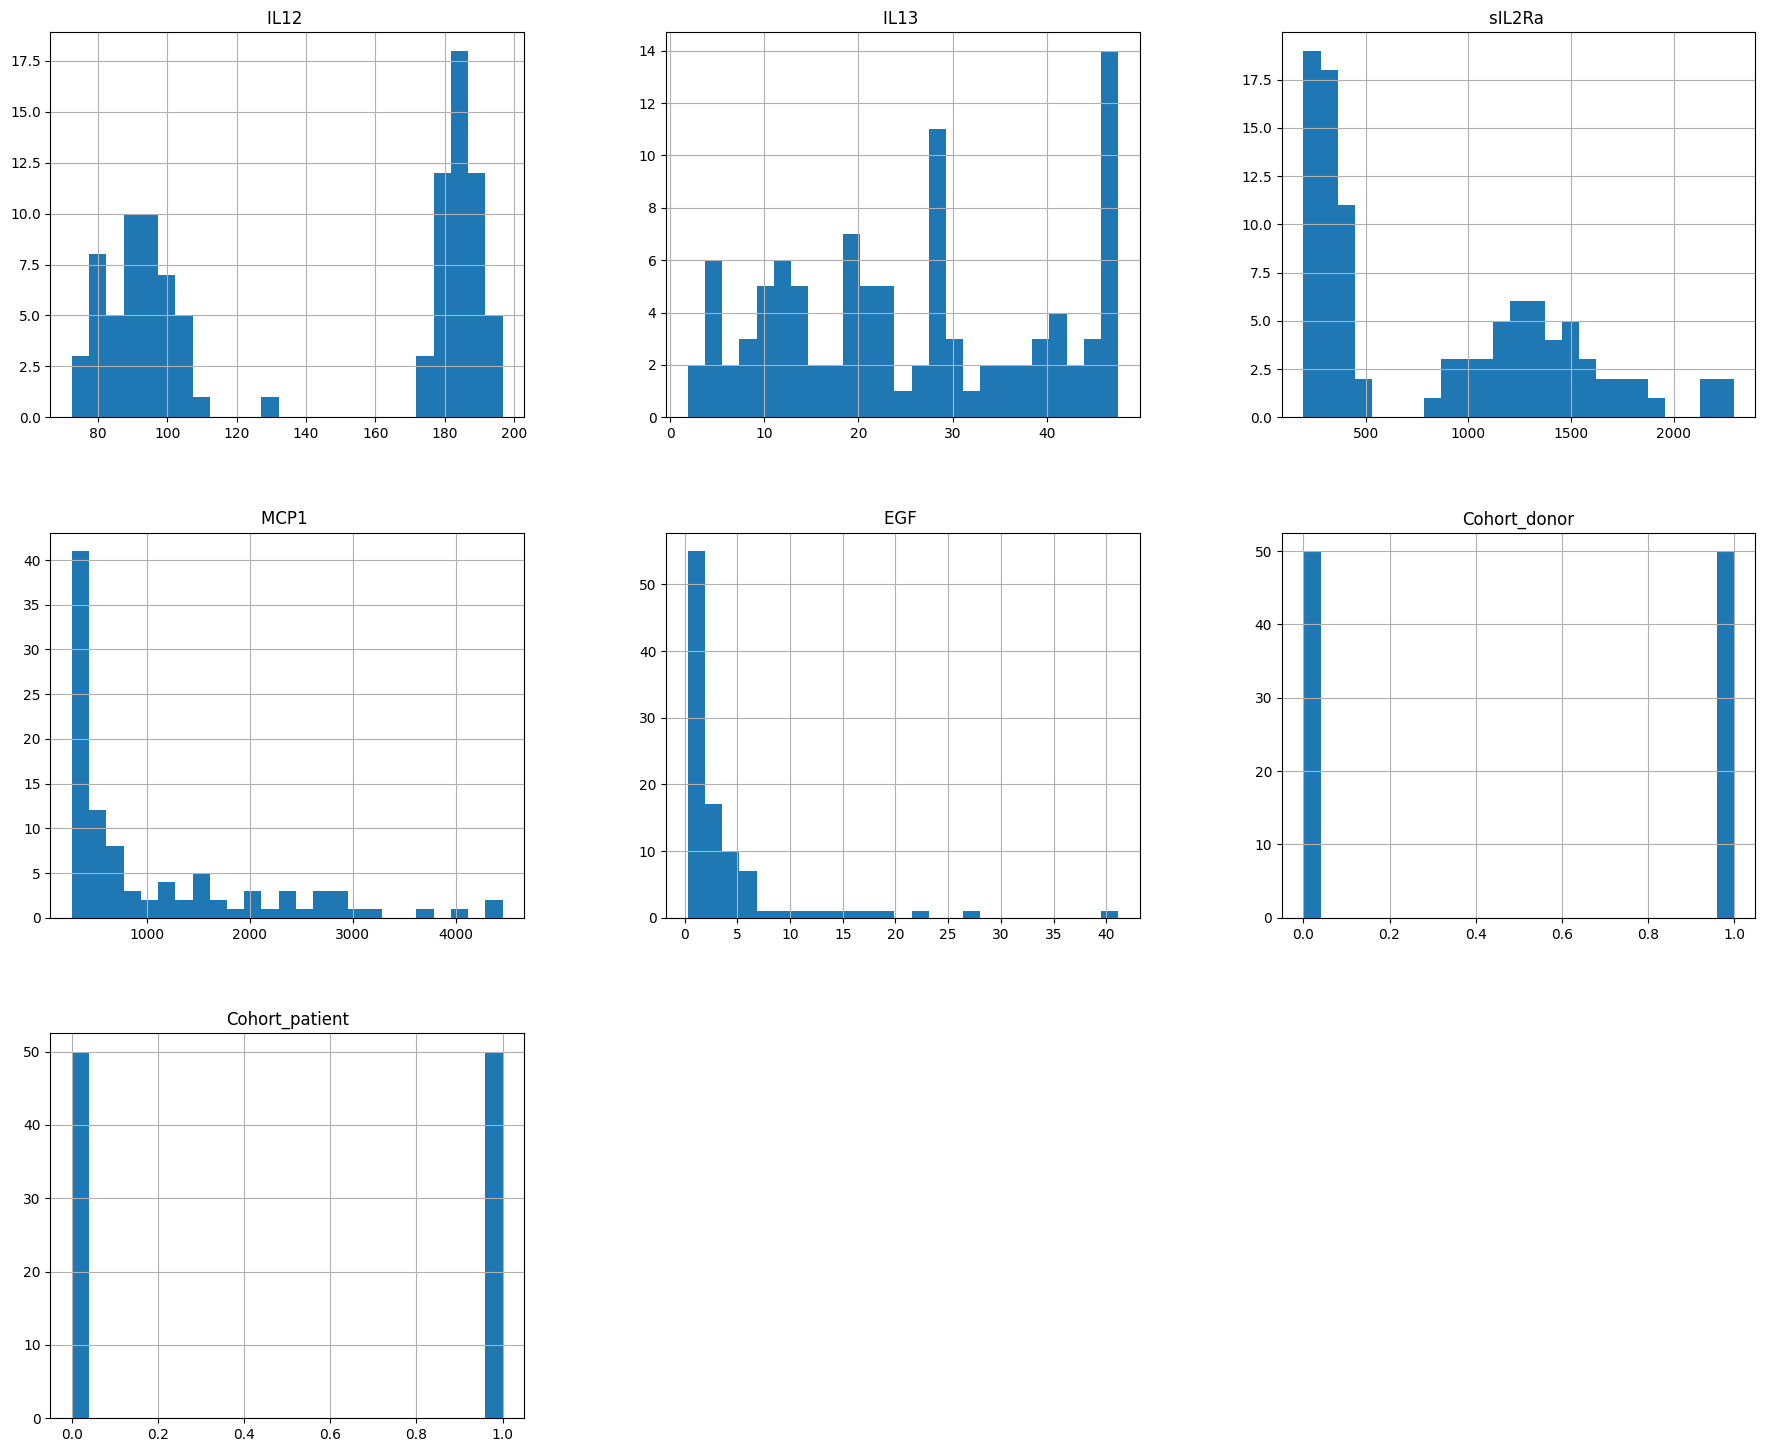

In [46]:
#Histogram for each column using the built-in pandas method
_ = df.hist(figsize=(22, 18), bins=25)

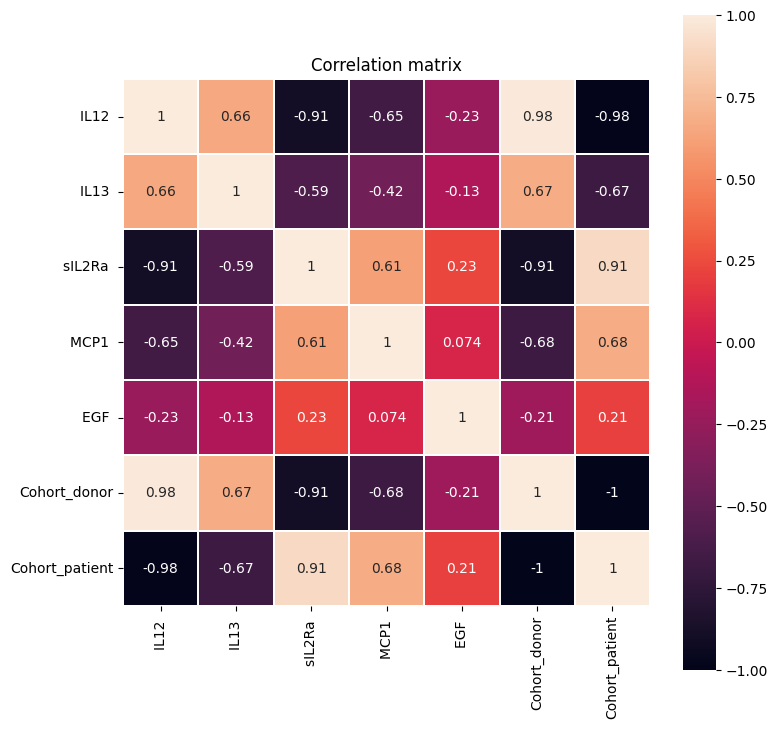

In [47]:
correlations = df.corr(method='pearson') 

plt.figure(figsize=(8.5,8.5))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix")
plt.show()

# **PERSISTENT HOMOLOGY**

##Generate data

In [48]:
# Convert Pandas DataFrame Into NumPy Array
ndarray = df.to_numpy()

ndarray.shape

(100, 7)

In [49]:
#Gives a new shape to an array without changing its data
data=ndarray.reshape(1, *ndarray.shape)
data

array([[[1.82427500e+02, 2.49701400e+01, 4.00850300e+02, 2.75807800e+02,
         8.54815000e-01, 1.00000000e+00, 0.00000000e+00],
        [1.75993100e+02, 1.98408400e+01, 3.02452800e+02, 4.58387900e+02,
         2.38282880e+00, 1.00000000e+00, 0.00000000e+00],
        [1.83098800e+02, 2.15693500e+01, 1.96877000e+02, 2.72032700e+02,
         1.22395760e+00, 1.00000000e+00, 0.00000000e+00],
        [1.85353400e+02, 4.74470400e+01, 2.32640300e+02, 2.73950900e+02,
         8.18926300e-01, 1.00000000e+00, 0.00000000e+00],
        [1.84680600e+02, 2.06352900e+01, 3.49702700e+02, 3.24803400e+02,
         2.15284930e+00, 1.00000000e+00, 0.00000000e+00],
        [1.87091600e+02, 4.10263400e+01, 3.48579400e+02, 2.77631600e+02,
         5.89821920e+00, 1.00000000e+00, 0.00000000e+00],
        [1.83514800e+02, 3.76206300e+01, 2.30458700e+02, 3.10593700e+02,
         7.07973920e+00, 1.00000000e+00, 0.00000000e+00],
        [1.81957200e+02, 4.69793600e+01, 2.52542800e+02, 3.22881200e+02,
         5

In [50]:
from gtda.plotting import plot_point_cloud
i = 0
plot_point_cloud(data[i])

##Calculate persistent homology

In [51]:
#Instantiate a VietorisRipsPersistence transformer 
#and calculate persistence diagrams for collection of point clouds
from gtda.homology import VietorisRipsPersistence
VR = VietorisRipsPersistence()
diagrams = VR.fit_transform(data)
diagrams.shape

(1, 111, 3)

In [52]:
# Persistence diagram in 2D 
from gtda.plotting import plot_diagram

i = 0
plot_diagram(diagrams[i])

##Extract features

In [53]:
#Instantiate a PersistenceEntropy transformer and extract scalar features from the persistence diagrams.
from gtda.diagrams import PersistenceEntropy

PE = PersistenceEntropy()
features = PE.fit_transform(diagrams)

In [54]:
features

array([[5.90367074, 2.65127927]])

##Use the new features in a standard classifier

In [55]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X_train, X_valid, y_train, y_valid = train_test_split(features, labels)
#model = RandomForestClassifier()
#model.fit(X_train, y_train)
#model.score(X_valid, y_valid)

In [56]:
#labels = np.zeros(40)
#labels[10:20] = 1
#labels[20:30] = 2
#labels[30:] = 3

In [57]:
#labels

In [58]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(oob_score=True, random_state=42)
#rf.fit(features, labels)
#rf.oob_score_

#MAPPER

##Import libraries

In [59]:
# Data wrangling
import numpy as np
import pandas as pd  # Not a requirement of giotto-tda, but is compatible with the gtda.mapper module

# Data viz
from gtda.plotting import plot_point_cloud

# TDA magic
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

# ML tools
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

##Generate and visualise data

In [60]:
df=df.iloc[:,:5] 

In [61]:
data2 = df.to_numpy()

In [62]:
plot_point_cloud(data2)

##Configure the Mapper pipeline

In [63]:
# Define filter function – can be any scikit-learn transformer
filter_func = Projection(columns=[0,1,2,3,4])
# Define cover
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
# Choose clustering algorithm – default is DBSCAN
clusterer = DBSCAN()

# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    filter_func=filter_func,
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

##Visualise the Mapper graph

In [64]:
fig = plot_static_mapper_graph(pipe, data2)
fig.show(config={'scrollZoom': True})

###Configure the colouring of the Mapper graph

In [65]:
plotly_params = {"node_trace": {"marker_colorscale": "Blues"}}
fig = plot_static_mapper_graph(
    pipe, data2, color_data=data2, plotly_params=plotly_params
)
fig.show(config={'scrollZoom': True})

In [66]:
# Initialise estimator to color graph by
pca = PCA(n_components=1)

fig = plot_static_mapper_graph(
    pipe, data2, color_data=data2, color_features=pca
)
fig.show(config={'scrollZoom': True})

In [67]:
fig = plot_static_mapper_graph(
    pipe, data2, color_data=data2, color_features=pca, node_color_statistic=lambda x: np.mean(x) / 2
)
fig.show(config={'scrollZoom': True})

In [68]:
graph = pipe.fit_transform(data2)
node_elements = graph.vs["node_elements"]
print(f"There are {len(node_elements)} nodes.\nThe first node consists of row indices {node_elements[0]}.")

There are 78 nodes.
The first node consists of row indices [ 0  1  2  4  8 20 22 24 39 41 45 48].


In [69]:
fig = plot_static_mapper_graph(
    pipe, data2, node_color_statistic=np.arange(len(node_elements))
)
fig.show(config={'scrollZoom': True})

###Pass a pandas DataFrame as input

In [70]:
df2 = pd.DataFrame(data2, columns=["IL12","IL13","sIL2Ra","MCP1","EGF"])
df2.head()

,IL12,IL13,sIL2Ra,MCP1,EGF
0,182.4275,24.97014,400.8503,275.8078,0.854815
1,175.9931,19.84084,302.4528,458.3879,2.382829
2,183.0988,21.56935,196.8770,272.0327,1.223958
3,185.3534,47.44704,232.6403,273.9509,0.818926
4,184.6806,20.63529,349.7027,324.8034,2.152849


In [71]:
pipe.set_params(filter_func=Projection(columns=["IL12","IL13","sIL2Ra","MCP1","EGF"]));

In [72]:
fig = plot_static_mapper_graph(pipe, df2, color_data=df2)
fig.show(config={'scrollZoom': True})

###Change the layout algorithm

In [73]:
# Reset back to numpy projection
pipe.set_params(filter_func=Projection(columns=[0,1,2,3,4]));

In [74]:
fig = plot_static_mapper_graph(
    pipe, data2, layout="fruchterman_reingold", color_data=data2
)
fig.show(config={'scrollZoom': True})

###Change the layout dimension

In [75]:
fig = plot_static_mapper_graph(pipe, data2, layout_dim=3, color_data=data2)
fig.show(config={'scrollZoom': True})

###Change the node size scale

In [76]:
node_scale = 30
fig = plot_static_mapper_graph(pipe, data2, layout_dim=3, node_scale=node_scale)
fig.show(config={'scrollZoom': True})